In [50]:
!curl -o image.jpg https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  462k  100  462k    0     0  3328k      0 --:--:-- --:--:-- --:--:-- 3328k


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np
from math import exp

In [ ]:
def gen_gaussian_kernel(size=5, sigma=1):
  kernel = np.empty((size, size))
  mean=size//2
  S = 0
  for x in range(size):
      for y in range(size):
          kernel[x][y] = exp(-0.5*(pow((x-mean)/sigma, 2.0) + pow((y-mean)/sigma, 2.0)))/(2*3.14*sigma*sigma)
          S += kernel[x][y]

  for x in range(size):
      for y in range(size):
          kernel[x][y] /= S
  return kernel

In [ ]:
gen_gaussian_kernel(5, 1)
"""
array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])
"""

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

## Gaussian filter


In [ ]:
def gaussian_filter(image):
  kernel = gen_gaussian_kernel()
  return cv2.filter2D(image, -1, kernel)

## Sharpening image using Laplace filter



In [ ]:
def sharpen_image(image):
  """
  Kernel
    0   -1  0
   -1   -5  -1
    0   -1  0
  """
  kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
  return cv2.filter2D(image, -1, kernel)

In [ ]:
def derivative_of_gaussian(image):
  kernel = np.array([1, 0, -1])
  gau = gaussian_filter(image)
  return cv2.filter2D(gau, -1, kernel)

In [ ]:
def laplace_of_gaussian(image):
  laplace_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
  gau = gaussian_filter(image)
  return cv2.filter2D(gau, -1, laplace_kernel)

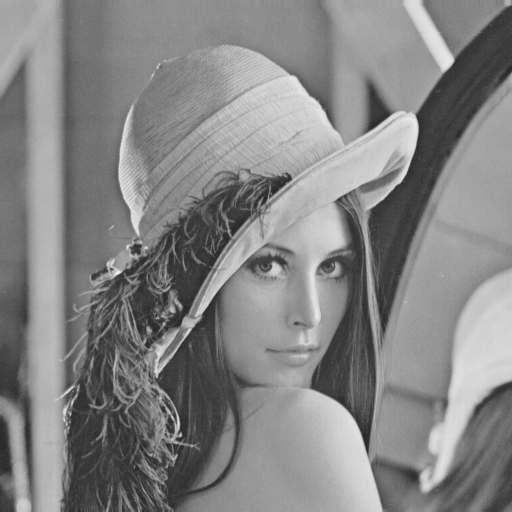

In [ ]:
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

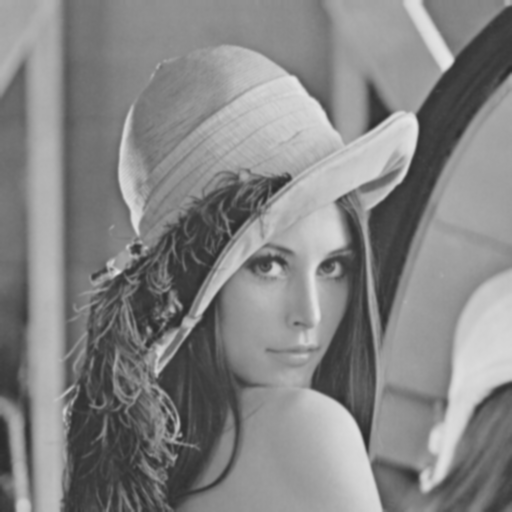

In [ ]:
gaussian = gaussian_filter(img)
cv2_imshow(gaussian)

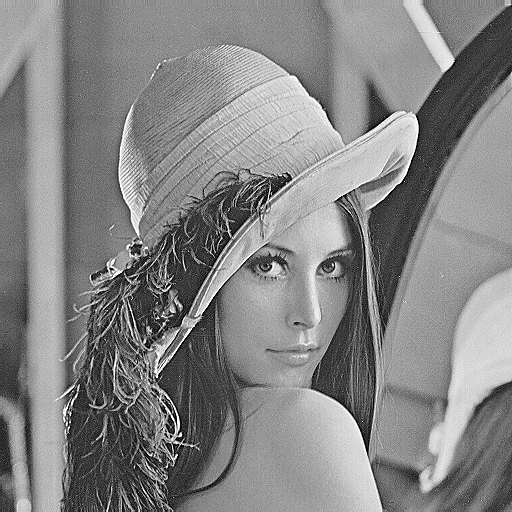

In [ ]:
sharpen = sharpen_image(img)
cv2_imshow(sharpen)

## Gaussian image pyramid



In [55]:
def delete_rows_and_cols(image, step=2):
  w, h = image.shape
  image = np.delete(image, range(0, w, step), axis=0)
  image = np.delete(image, range(0, h, step), axis=1)
  return image

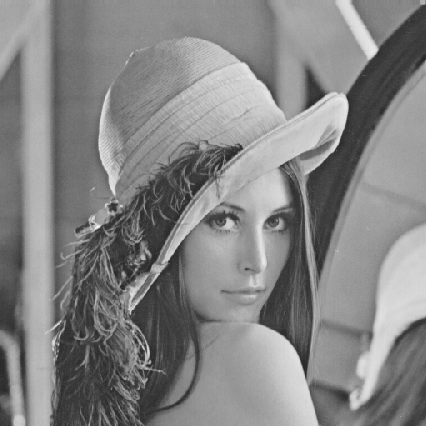

In [60]:
resized = delete_rows_and_cols(img, step=6)
cv2_imshow(resized)

In [96]:
def gaussian_pyramid(image, total=2):
  count = 0
  while True:
    image = gaussian_filter(image)
    image = delete_even_rows_and_cols(image)
    count += 1
    if count == total:
      break
  return image

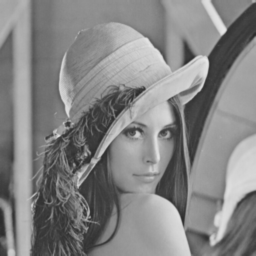

In [97]:
half_gaussian = gaussian_pyramid(img, total=1)
cv2_imshow(half_gaussian)

## Laplace image pyramid


In [138]:
class LaplacePyramid:
  def __init__(self, image):
    self.image = image
    self.residual = []
    self.total = 0

  def construct(self, total):
    self.total = total
    count = 0
    while True:
      gau = gaussian_filter(self.image) # Filter
      self.residual.append(self.image - gau) # Compute residual
      self.image = delete_rows_and_cols(self.image)
      count += 1
      if count == total:
        break

  def double_upsample(self):
    self.image = np.repeat(self.image, repeats=2, axis=0)
    self.image = np.repeat(self.image, repeats=2, axis=1)

  def reconstruct(self):
    for res in self.residual[::-1]:
      # Upsample & blur
      self.double_upsample()
      self.image = gaussian_filter(self.image)
      # Sum
      self.image += res

l = LaplacePyramid(img)

### Constructing


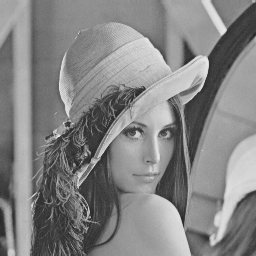

In [139]:
# Constructing
l.construct(total=1
cv2_imshow(l.image)

### Reconstructing


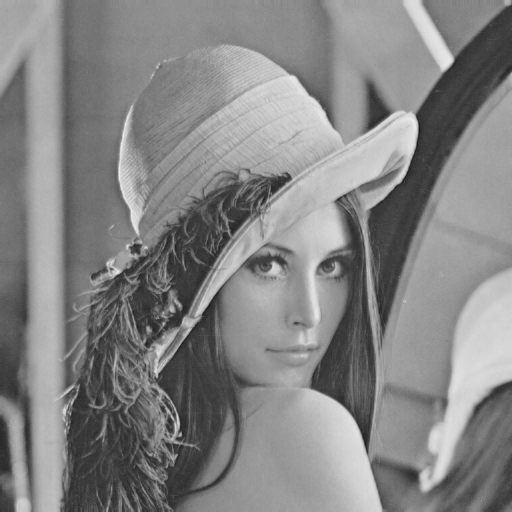

In [140]:
# Reconstructing
l.reconstruct()
cv2_imshow(l.image)